In [36]:
# Preamble
import pandas as pd
import sklearn.linear_model
import math
import sklearn.model_selection
import sklearn.metrics

In [37]:
# Fetch
cars = pd.read_csv('Australian Vehicle Prices.csv')

In [38]:
# Cleaning
cars['Kilometres'] = pd.to_numeric(cars["Kilometres"], errors= "coerce")
cars['Price'] = pd.to_numeric(cars["Price"], errors = "coerce")
cars.dropna(subset = ['Kilometres', 'Price'], inplace = True)

In [39]:
cars = cars[(cars.Kilometres > 1000) & (cars.Price < 100000)]

<Axes: xlabel='Kilometres', ylabel='Price'>

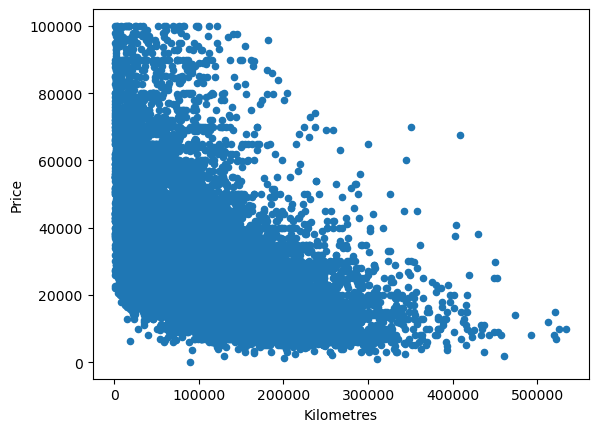

In [40]:
# Visualise
cars.plot.scatter(x = 'Kilometres', y='Price')

In [41]:
# Feature engineering
cars['Log_Kilometres'] = cars.Kilometres.map(math.log10)

<Axes: xlabel='Log_Kilometres', ylabel='Price'>

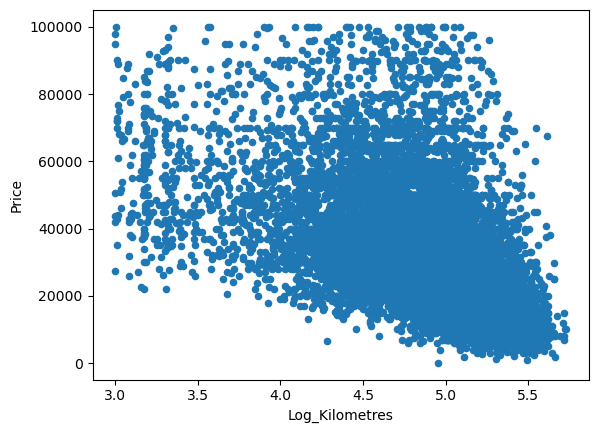

In [42]:
cars.plot.scatter(x = 'Log_Kilometres', y='Price')

In [43]:
#Split
train, holdout = sklearn.model_selection.train_test_split(cars)

In [44]:
validation, test_data = sklearn.model_selection.train_test_split(holdout)

In [45]:
ts = sklearn.linear_model.TheilSenRegressor()
ransac = sklearn.linear_model.RANSACRegressor()

In [46]:
ts.fit(train[['Log_Kilometres']], train['Price'])

TheilSenRegressor()

In [47]:
ransac.fit(train[['Log_Kilometres']], train['Price'])

RANSACRegressor()

In [48]:
# Evaluate
ts_prediction = ts.predict(validation[['Log_Kilometres']]) 
ransac_prediction = ransac.predict(validation[['Log_Kilometres']])

In [49]:
ts_prediction

array([30145.60941708, 16367.75375661, 44684.09862217, ...,
       28853.85079655, 30030.640895  , 14803.10745211])

In [ ]:

sklearn.metrics.r2_score(validation['Price'], ts_prediction)

0.24534526294450376

In [30]:
sklearn.metrics.r2_score(validation['Price'], ransac_prediction)

0.21526500572171348

In [32]:
#Report
ts_test_predictions = ts.predict(test_data[['Log_Kilometres']])
sklearn.metrics.r2_score(test_data['Price'], ts_test_predictions)

0.19691455986326611